### Introduction
## Perkenalkan, Saya Ahmad Rafi Muzakki
### dalam final project 3 ini saya akan kembali melakukan EDA dengan menggunakan dataset Heart Failure
### Objektif dalam final project ini adalah dapat melakukan import dataset, melakukan preprocessing, memberi visual
### Serta memberi implementasi dengan machine learning

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

### For Train and Modelling the Data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Documents\Hacktivist_Final Project\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.shape

(299, 13)

### Data Cleansing ### 


In [6]:
### Lets check is there any missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
### Lets check if there any duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [8]:
### Lets separate between categorical analysis
categorical_list=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]

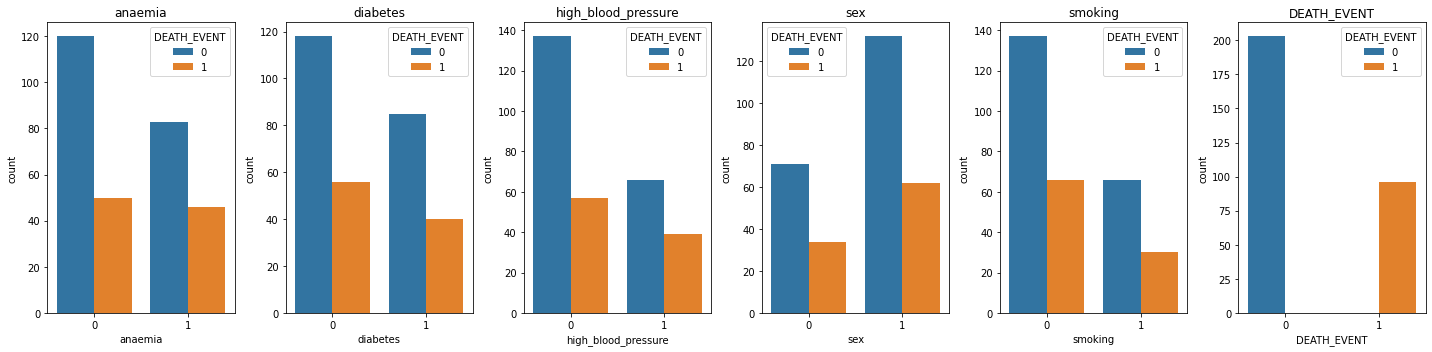

In [9]:
df_categoric = df.loc[:, categorical_list]

fig, axs = plt.subplots(ncols=len(categorical_list), figsize=(20,5))

for i, col in enumerate(categorical_list):
        sns.countplot(x=col, data=df_categoric, hue="DEATH_EVENT", ax=axs[i])
        axs[i].set_title(col)

plt.tight_layout()
plt.show() 

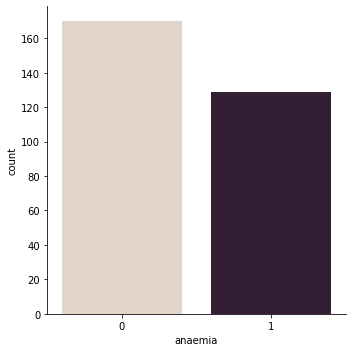

In [10]:
sns.catplot(data=df, x="anaemia", kind="count", palette="ch:.24")

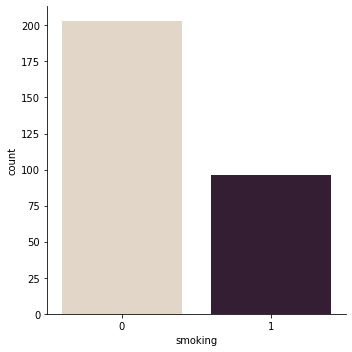

In [11]:
sns.catplot(data=df, x="smoking", kind="count", palette="ch:.24")

### Data Preprocessing ###

In [12]:
new_df=df.copy()
new_df= pd.get_dummies(new_df, columns = categorical_list[:-1], drop_first = True)
new_df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,0,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,0,1,1
3,50.0,111,20,210000.00,1.9,137,7,1,1,0,0,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,1,0,0,0


In [13]:
x_data = new_df.drop(["DEATH_EVENT"], axis = 1)
y = new_df.DEATH_EVENT.values

In [14]:
### Normalization the data
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0.0,0.0,1.0,1.0,0.0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0.0,0.0,0.0,1.0,0.0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0.0,0.0,0.0,1.0,1.0
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1.0,0.0,0.0,1.0,0.0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.004848,0.363636,0.157474,0.067416,0.857143,0.946619,0.0,1.0,1.0,1.0,1.0
295,0.272727,0.229268,0.363636,0.296884,0.078652,0.742857,0.950178,0.0,0.0,0.0,0.0,0.0
296,0.090909,0.259888,0.696970,0.869075,0.033708,0.714286,0.975089,0.0,1.0,0.0,0.0,0.0
297,0.090909,0.304925,0.363636,0.139290,0.101124,0.771429,0.982206,0.0,0.0,0.0,1.0,1.0


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

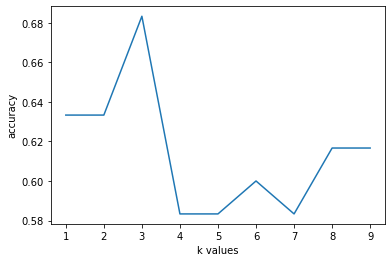

In [16]:
#find k value
score_list=[]
for each in range(1,10):
        knn=KNeighborsClassifier(n_neighbors=each)
        knn.fit(x_train,y_train)
        score_list.append(knn.score(x_test,y_test))
        
plt.plot(range(1,10),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [17]:
### Now Lets use knn model for our test
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("{} nn score:{}".format(3,knn.score(x_test,y_test)))

3 nn score:0.6833333333333333


Cross Validation Values: 8


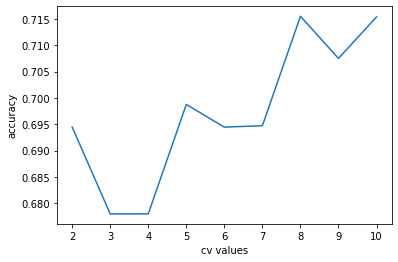

In [18]:
## Trying K fold cross validation with knn
score_list = []
for cv in range(2, 11):
        knn_tuning = KNeighborsClassifier(n_neighbors=3)
        accuracies = cross_val_score(estimator=knn_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
best_cv = np.argmax(score_list) + 2
print("Cross Validation Values:", best_cv)
    
plt.plot(range(2,11),score_list)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [19]:
accuracies = cross_val_score(knn_tuning, X=x_train,y=y_train, cv=8)
accuracies

array([0.63333333, 0.76666667, 0.7       , 0.66666667, 0.7       ,
       0.8       , 0.73333333, 0.72413793])

In [20]:
accuracies = cross_val_score(knn_tuning, X=x_train,y=y_train, cv=8)
print("mean_accuracy:", np.mean(accuracies))
print("mean_std:",np.std(accuracies))
knn_tuning.fit(x_train,y_train)
print("test accuracy:",knn_tuning.score(x_test,y_test))

mean_accuracy: 0.7155172413793103
mean_std: 0.04970849095670971
test accuracy: 0.6833333333333333


In [21]:
 def get_cross_validation_accuracy(model, X, y, cv):
        accuracies = cross_val_score(model, X, y, cv=cv)
        return np.mean(accuracies)
    
knn_accuracy = get_cross_validation_accuracy(knn_tuning, x_train, y_train, cv=8)
print("Cross-validation Score:", knn_accuracy)

Cross-validation Score: 0.7155172413793103


# The cross validation score that we get is 71%
# which is not good enough as we want to aim the 80% score
# That's why we can check another modelling that we can use
# In this case, i would like to use Logistic regression to see if there's any improvement for the score.

## Logistic Regression

In [22]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("accuracy of logistic regression:",lr.score(x_test,y_test))

accuracy of logistic regression: 0.7166666666666667


Best CV values: 10


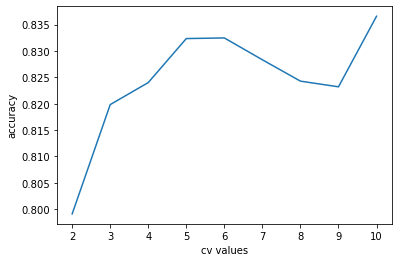

In [23]:
## Now lets do some k fold cross validation again, but this time with Logistic Regression
score_list = []
for cv in range(2, 11):
        lr_tuning =LogisticRegression()
        accuracies = cross_val_score(estimator=lr_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
best_cv = np.argmax(score_list) + 2
print("Best CV values:", best_cv)
    
plt.plot(range(2,11),score_list)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [24]:
## Lets test the accuracies
accuracies = cross_val_score(lr_tuning, X=x_train,y=y_train, cv=10)
accuracies

array([0.79166667, 0.95833333, 0.875     , 0.79166667, 0.91666667,
       0.91666667, 0.875     , 0.66666667, 0.79166667, 0.7826087 ])

In [25]:
accuracies = cross_val_score(lr_tuning, X=x_train,y=y_train, cv=10)
print("mean_accuracy:", np.mean(accuracies))
print("mean_std:",np.std(accuracies))
lr_tuning.fit(x_train,y_train)
print("test accuracy:",lr_tuning.score(x_test,y_test))

mean_accuracy: 0.8365942028985508
mean_std: 0.08272779362880019
test accuracy: 0.7166666666666667


In [26]:
def get_cross_validation_accuracy(model, X, y, cv):
        accuracies = cross_val_score(model, X, y, cv=cv)
        return np.mean(accuracies)
    
lr_accuracy = get_cross_validation_accuracy(lr_tuning, x_train, y_train, cv=10)
print("Cross-validation score:", lr_accuracy)

Cross-validation score: 0.8365942028985508


# With LR modelling, CV score that we have is 83%, which is higher score point than the KNN model
# The LR modelling is better option that we have for this type of datasets because it have higher values